# EDA Analysis on the GTZAN dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa as librosa
import librosa.display as lplt
import subprocess
import csv

In [3]:
absolute_path = "f:\\AI Projects\\Music Classification"
relative_path = "Data\\GTZAN\\genres"
full_path = os.path.join(absolute_path, relative_path)
print(full_path)

f:\AI Projects\Music Classification\Data\GTZAN\genres


In [4]:
generes_list = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

Convert all .wav files into .wav formats for easy reading


In [5]:
genre_dirs = []

for i in generes_list:
	genre_dirs.append(os.path.join(full_path,i))

for genre_dir in genre_dirs:
	# change directory to genre_dir
	os.chdir(genre_dir)

	# loop through each file in current dir
	for file in os.listdir(genre_dir):
		if str(file[-3:]) != "wav":
		# SOX
			subprocess.run("sox " + str(file) + " " + str(file[:-3]) + ".wav",shell=True)
		else:
			print(f"Skipping {file}")

	# delete .wav from current dir
	os.system("del *.au")
	print('\n')

print("Conversion complete. Check respective directories.")

Skipping blues.00000.wav
Skipping blues.00001.wav
Skipping blues.00002.wav
Skipping blues.00003.wav
Skipping blues.00004.wav
Skipping blues.00005.wav
Skipping blues.00006.wav
Skipping blues.00007.wav
Skipping blues.00008.wav
Skipping blues.00009.wav
Skipping blues.00010.wav
Skipping blues.00011.wav
Skipping blues.00012.wav
Skipping blues.00013.wav
Skipping blues.00014.wav
Skipping blues.00015.wav
Skipping blues.00016.wav
Skipping blues.00017.wav
Skipping blues.00018.wav
Skipping blues.00019.wav
Skipping blues.00020.wav
Skipping blues.00021.wav
Skipping blues.00022.wav
Skipping blues.00023.wav
Skipping blues.00024.wav
Skipping blues.00025.wav
Skipping blues.00026.wav
Skipping blues.00027.wav
Skipping blues.00028.wav
Skipping blues.00029.wav
Skipping blues.00030.wav
Skipping blues.00031.wav
Skipping blues.00032.wav
Skipping blues.00033.wav
Skipping blues.00034.wav
Skipping blues.00035.wav
Skipping blues.00036.wav
Skipping blues.00037.wav
Skipping blues.00038.wav
Skipping blues.00039.wav


Source: https://medium.com/@sdoshi579/classification-of-music-into-different-genres-using-keras-82ab5339efe0

In [30]:
def cut_song(song):
  start = 0
  end = len(song)
  
  song_pieces = []

  while start + 100000 < end:
    song_pieces.append(song[start:start+100000])

    start += 100000

  return song_pieces

def generate_metadata(file_name = "metadata.csv",force_reload = False,split_songs = False):
    file = None
    GTZAN_path = os.path.join(absolute_path,"Data\\GTZAN\genres")
    file_path = os.path.join(GTZAN_path,file_name)
    
    header = 'filename length chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate tempo'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()

    if not os.path.exists(file_path) or force_reload:
        if not os.path.exists(file_path):
            file = open(file_path, 'x', newline='')
        elif force_reload:
            file = open(file_path, 'w', newline='')
            
        with file:
            writer = csv.writer(file)
            writer.writerow(header)
        
        for g in generes_list:
            for filename in os.listdir(f'{GTZAN_path}\\{g}'):
                songname = f'{GTZAN_path}\\{g}\\{filename}'
                if not split_songs: 
                    y, sr = librosa.load(songname, mono=True, duration=30)
                    length = librosa.get_duration(y=y,sr=sr)
                    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
                    rmse = librosa.feature.rms(y=y)
                    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
                    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
                    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
                    zcr = librosa.feature.zero_crossing_rate(y)
                    tempo = librosa.beat.tempo(y=y,sr=sr)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr)
                    to_append = f'{filename} {np.mean(length)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(tempo)}'  
                    for e in mfcc:
                        to_append += f' {np.mean(e)}'
                    to_append += f' {g}'
                    file = open(file_path, 'a', newline='')
                    with file:
                        writer = csv.writer(file)
                        writer.writerow(to_append.split())
                else:
                    y, sr = librosa.load(songname, mono=True, duration=30)
                    y = cut_song(y)
                    for x,s in enumerate(y):
                        length = librosa.get_duration(y=s,sr=sr)
                        chroma_stft = librosa.feature.chroma_stft(y=s, sr=sr)
                        rmse = librosa.feature.rms(y=s)
                        spec_cent = librosa.feature.spectral_centroid(y=s, sr=sr)
                        spec_bw = librosa.feature.spectral_bandwidth(y=s, sr=sr)
                        rolloff = librosa.feature.spectral_rolloff(y=s, sr=sr)
                        zcr = librosa.feature.zero_crossing_rate(s)
                        tempo = librosa.beat.tempo(y=s,sr=sr)
                        mfcc = librosa.feature.mfcc(y=s, sr=sr)
                        to_append = f'{filename}-{x} {np.mean(length)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(tempo)}'  
                        for e in mfcc:
                            to_append += f' {np.mean(e)}'
                        to_append += f' {g}'
                        file = open(file_path, 'a', newline='')
                        with file:
                            writer = csv.writer(file)
                            writer.writerow(to_append.split())
    else:
        print("Skipping metadata generation")

In [32]:
generate_metadata(force_reload=False,split_songs=True)

In [33]:
GTZAN_path = os.path.join(absolute_path,"Data\\GTZAN\genres")
file_path = os.path.join(GTZAN_path,"metadata.csv")
metadata = pd.read_csv(file_path)
metadata.head()

filename    length  chroma_stft      rmse  spectral_centroid  \
0  blues.00000.wav-0  4.535147     0.340607  0.122398        1773.076114   
1  blues.00000.wav-1  4.535147     0.339364  0.127939        1803.120119   
2  blues.00000.wav-2  4.535147     0.353243  0.133503        1696.046590   
3  blues.00000.wav-3  4.535147     0.363599  0.136399        1838.935722   
4  blues.00000.wav-4  4.535147     0.371211  0.128614        1860.273385   

   spectral_bandwidth      rolloff  zero_crossing_rate       tempo  \
0         1955.868447  3688.494873            0.086391  123.046875   
1         2080.744242  3999.078369            0.074787  123.046875   
2         2005.172557  3666.302490            0.071120  123.046875   
3         2056.596597  4000.726318            0.083897  129.199219   
4         2067.494800  4014.349365            0.084191  123.046875   

        mfcc1  ...     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16  \
0 -120.494301  ...   9.283965 -5.682326  6.937242 -8.601155 -2.293055   
1 -129.895981  ...   9.417705 -4.340737  7.461563 -2.396798  5.010379   
2 -112.161453  ...  12.625378 -5.172403  7.630077 -9.772185 -0.666326   
3 -104.236809  ...  10.776512 -3.352736  5.841449 -6.146827  1.855989   
4 -107.887718  ...  11.879320 -7.173142  6.693336 -5.317769  5.295383   

     mfcc17    mfcc18    mfcc19    mfcc20  label  
0 -3.826715  1.019838 -2.412001  2.953042  blues  
1 -2.351950  0.144454 -3.089383  1.655918  blues  
2 -2.126123  1.459213 -3.145484  2.411724  blues  
3 -1.923221 -0.356437 -3.449448  2.081537  blues  
4 -2.547254  0.429121 -2.686537  1.922374  blues  

[5 rows x 30 columns]

#### Waveform for each audio sample in each of the 10 genres

In [34]:
from IPython.display import Audio
Audio(f'{full_path}\\blues\\blues.00000.wav')

In [35]:
Audio(f'{full_path}\\metal\\metal.00000.wav')

In [36]:
tracks = ["blues\\blues.00000.wav",
"classical\\classical.00000.wav",
"country\\country.00000.wav",
"disco\\disco.00000.wav",
"hiphop\\hiphop.00000.wav",
"jazz\\jazz.00000.wav",
"metal\\metal.00000.wav",
"pop\\pop.00000.wav",
"reggae\\reggae.00000.wav",
"rock\\rock.00000.wav"]

Spectrogram on frequency

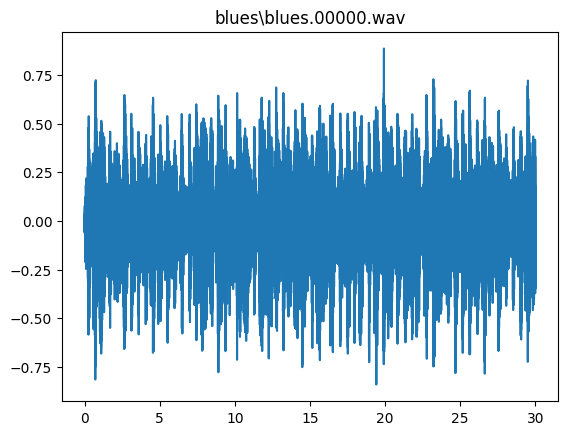

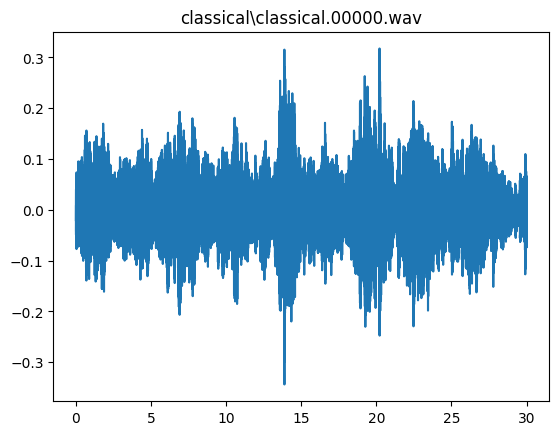

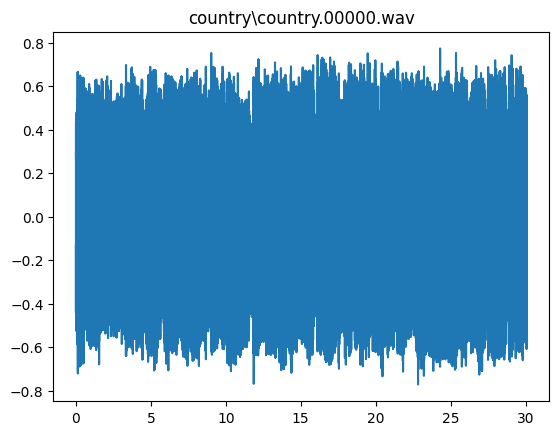

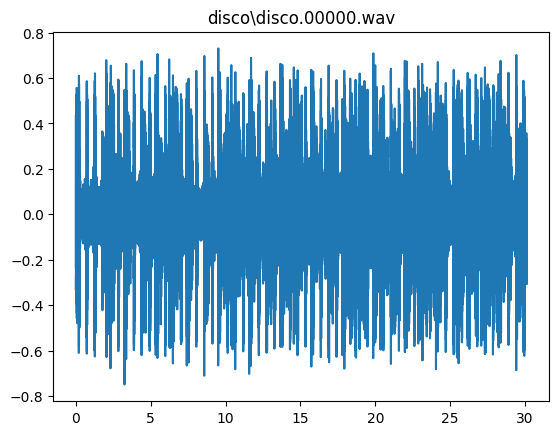

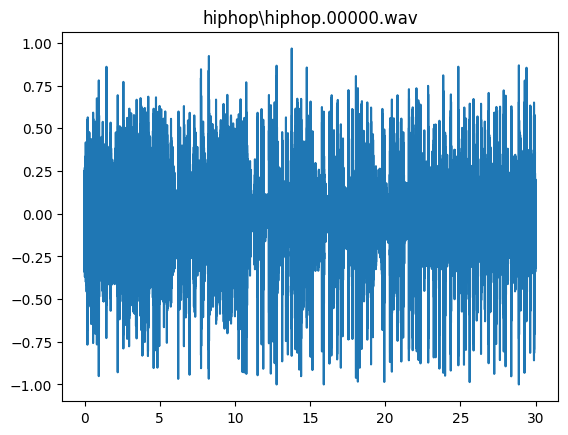

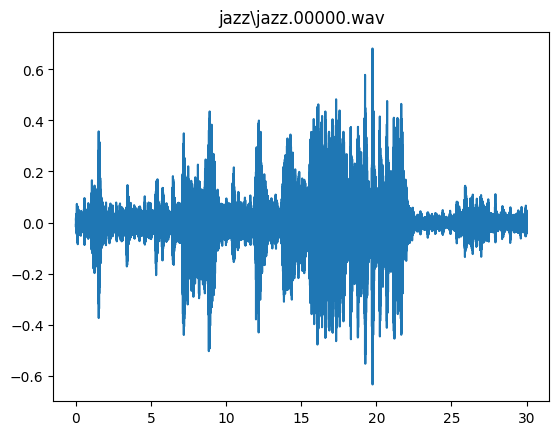

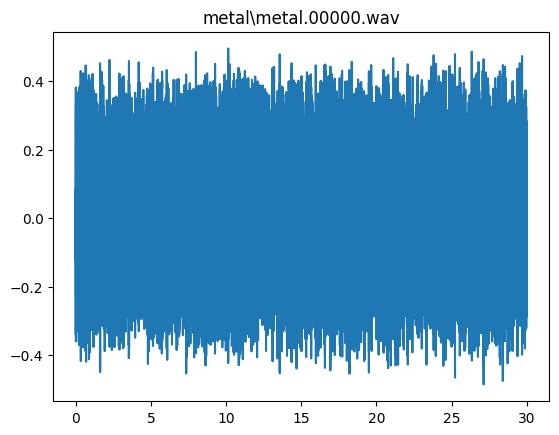

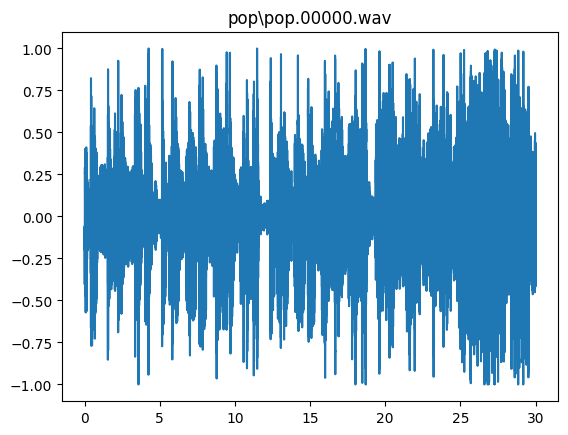

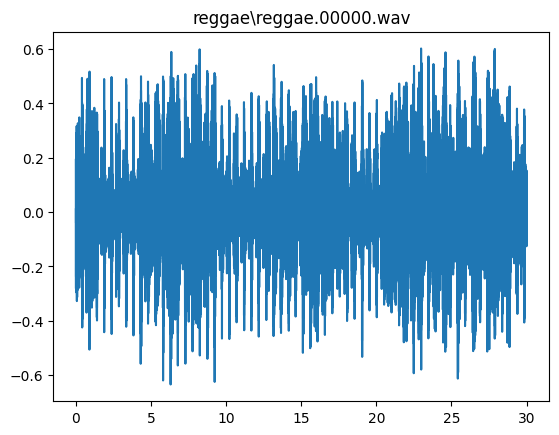

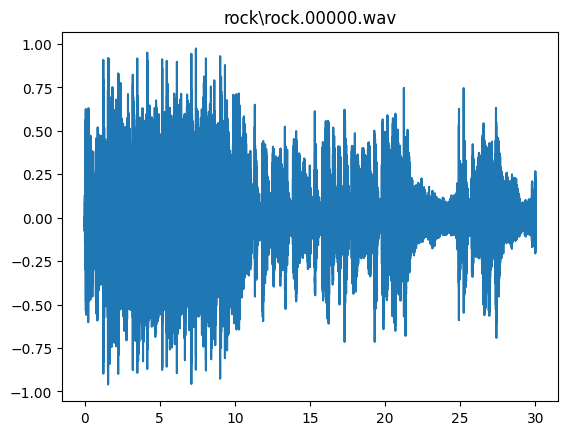

In [37]:
for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    time = np.arange(0,len(audio))/sfreq
    ax.plot(time,audio)
    ax.set_title(tracks[i])
    plt.show()

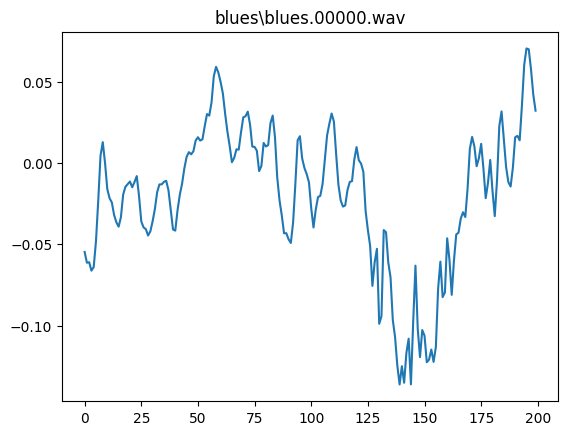

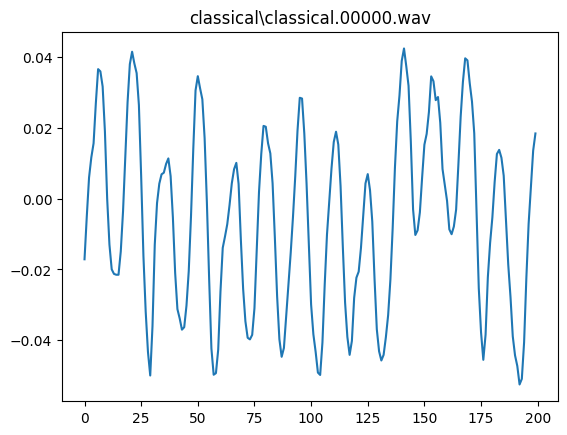

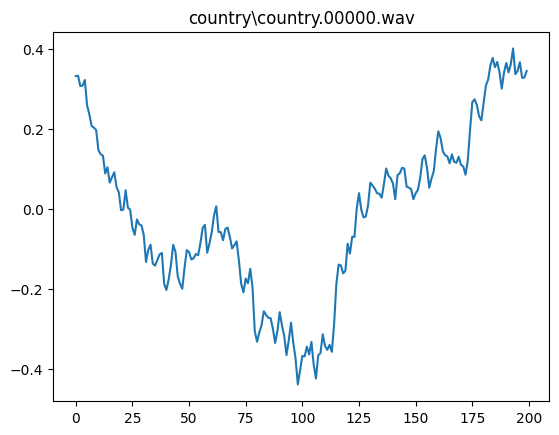

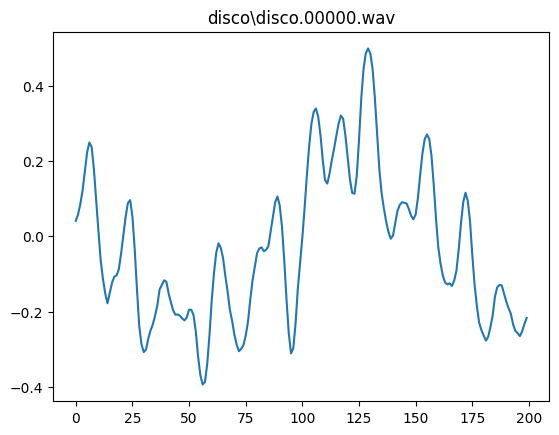

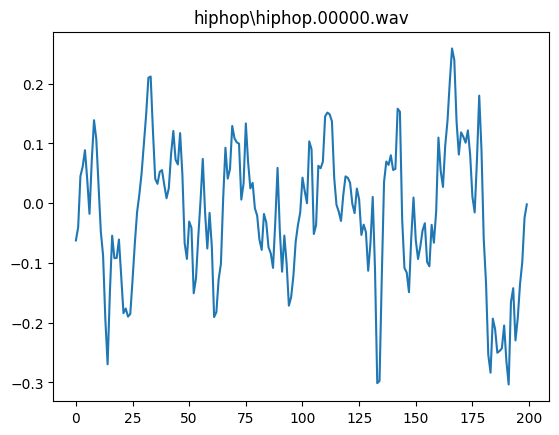

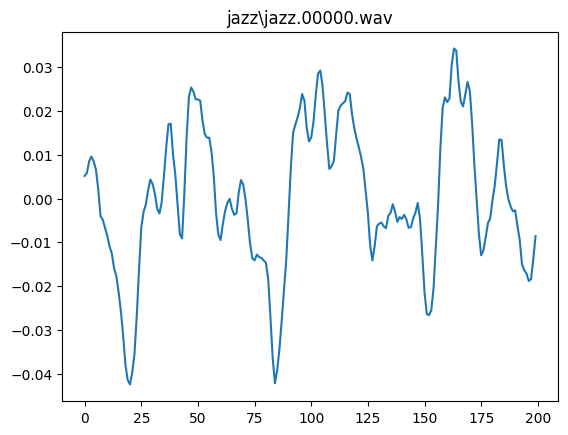

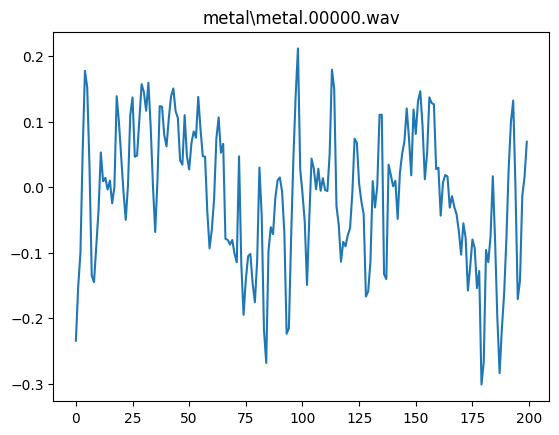

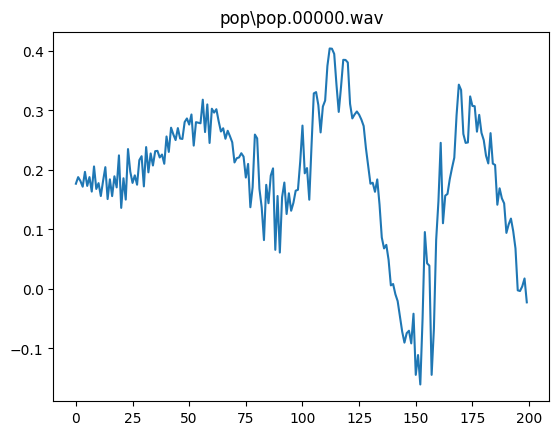

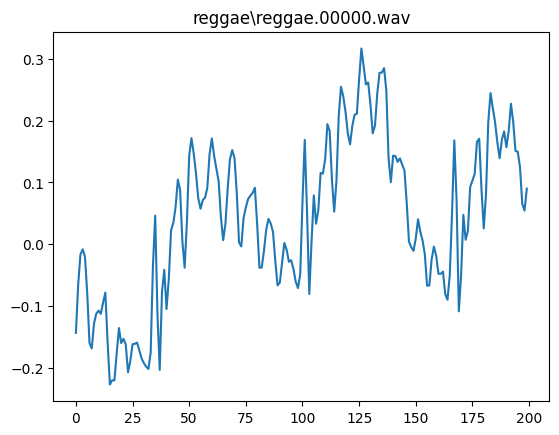

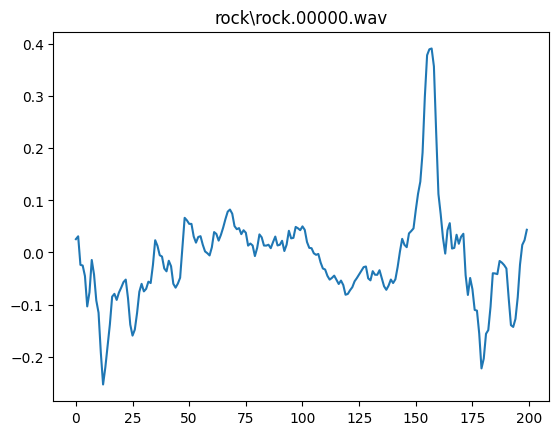

In [38]:
for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    ax.plot(audio[1000:1200])
    ax.set_title(tracks[i])
    plt.show()

#### Spectrogram for each of the audio samples in each of the 10 genres

d:\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


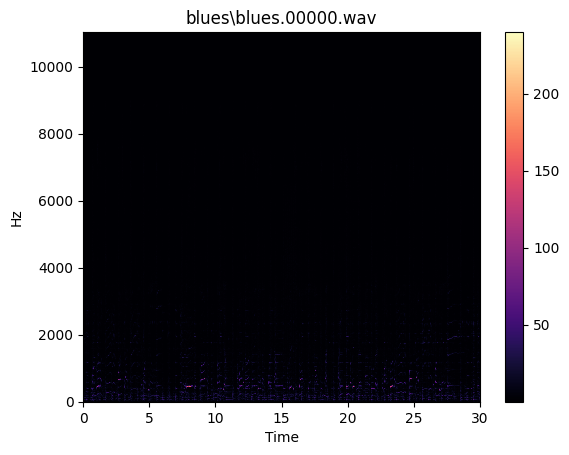

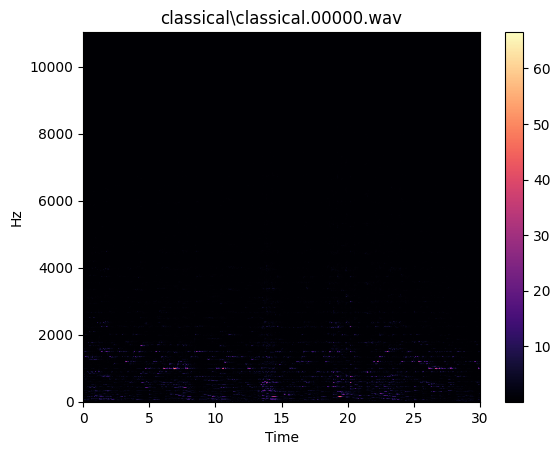

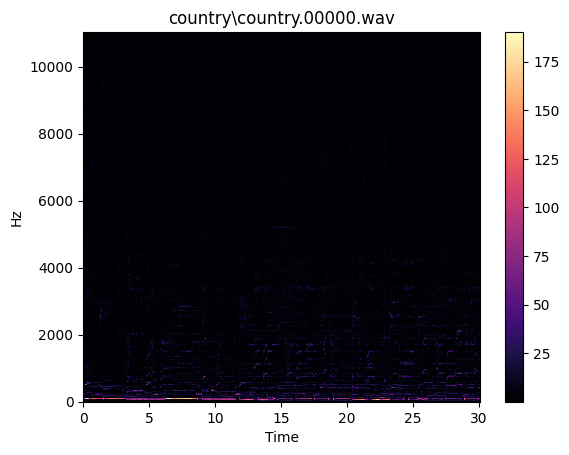

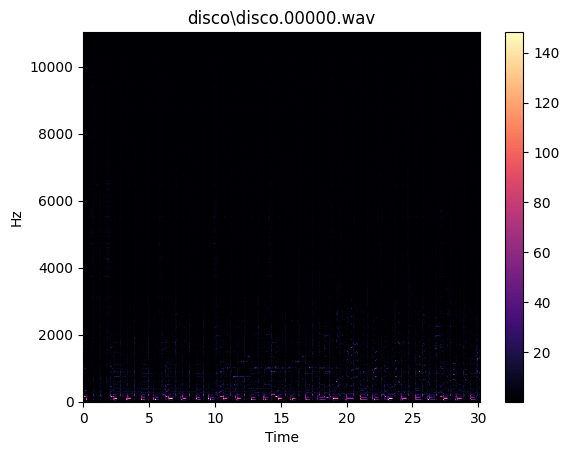

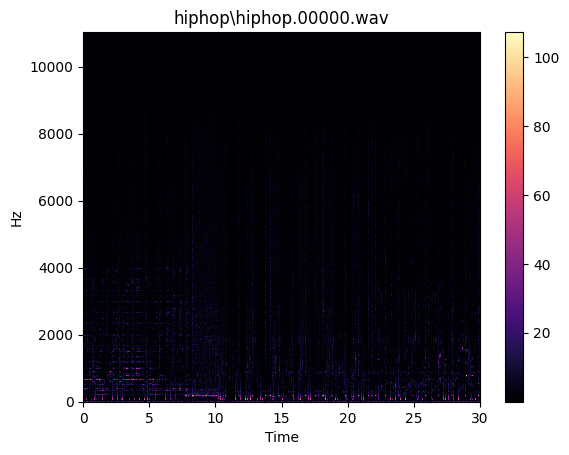

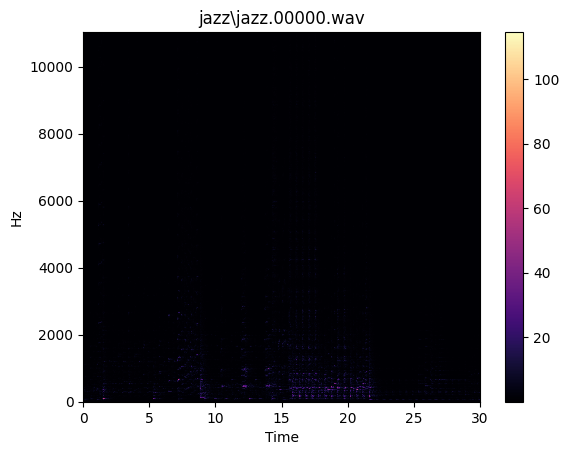

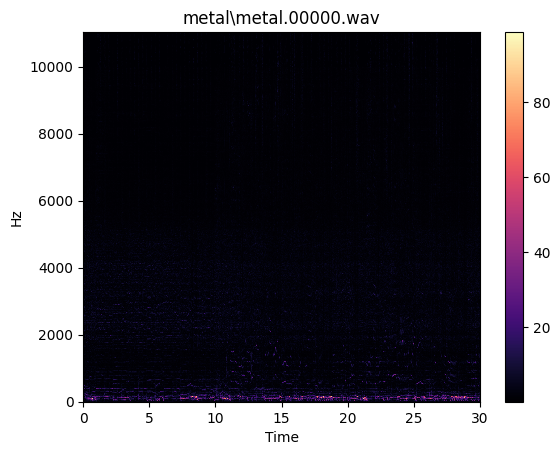

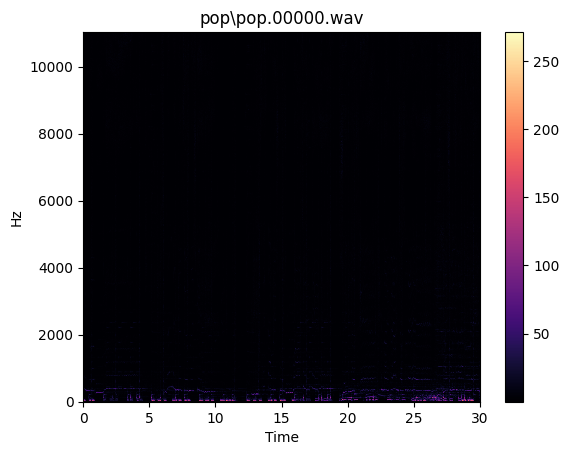

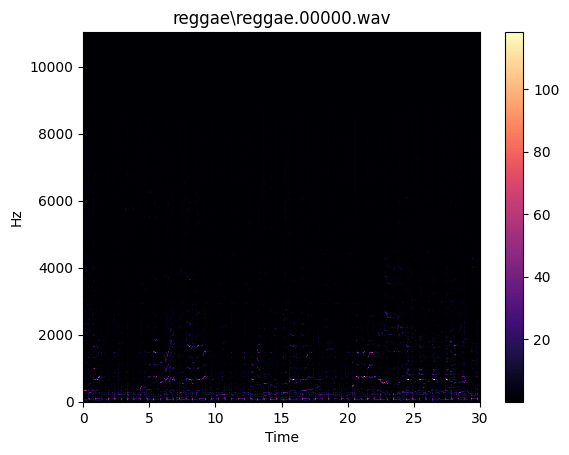

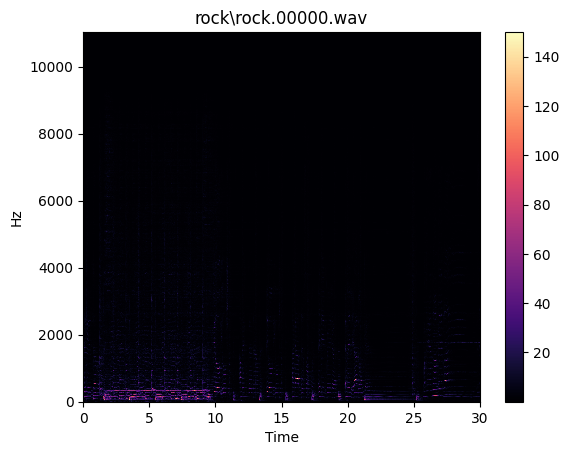

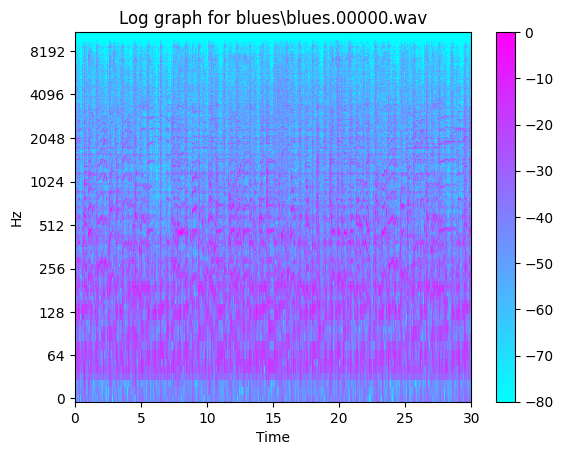

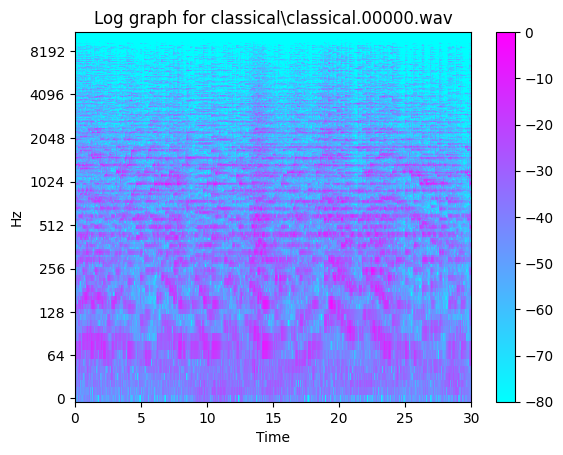

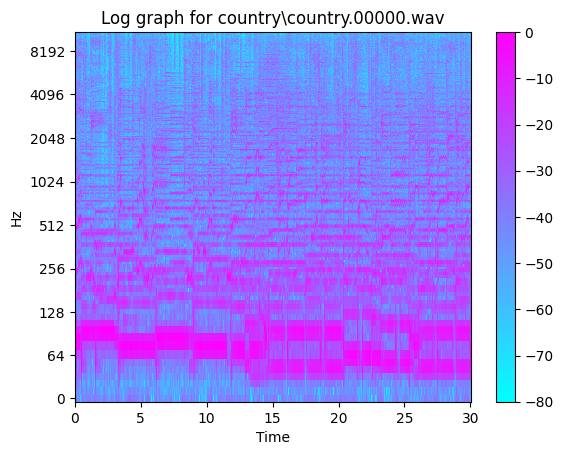

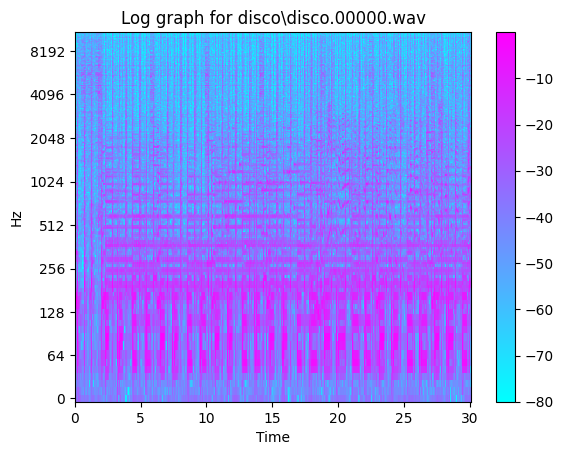

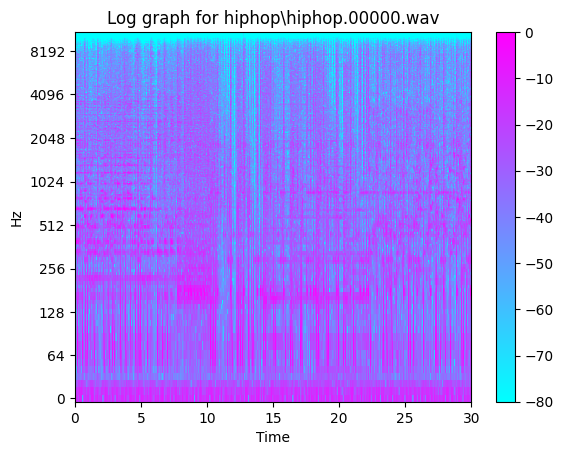

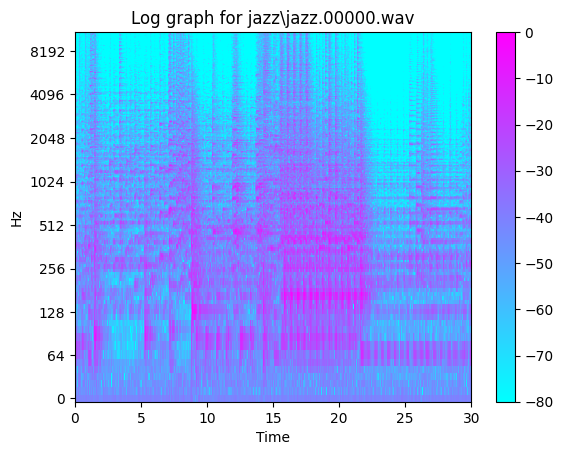

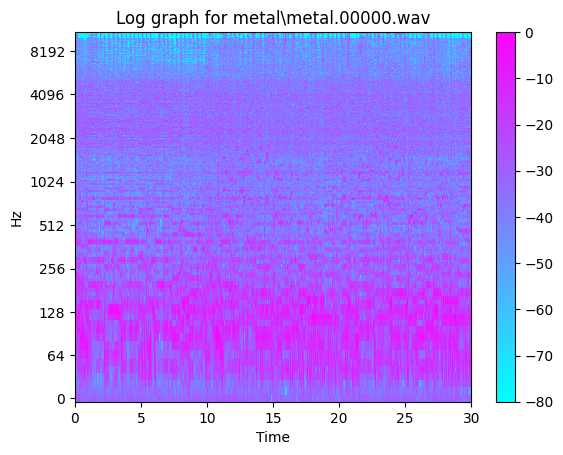

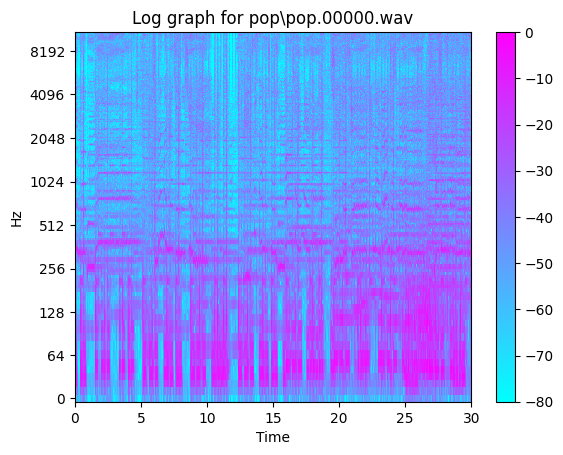

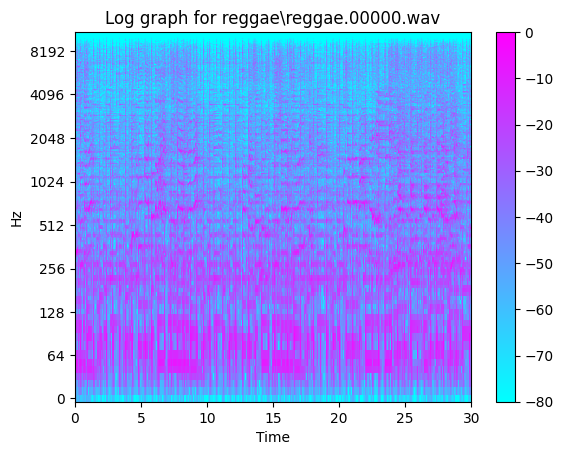

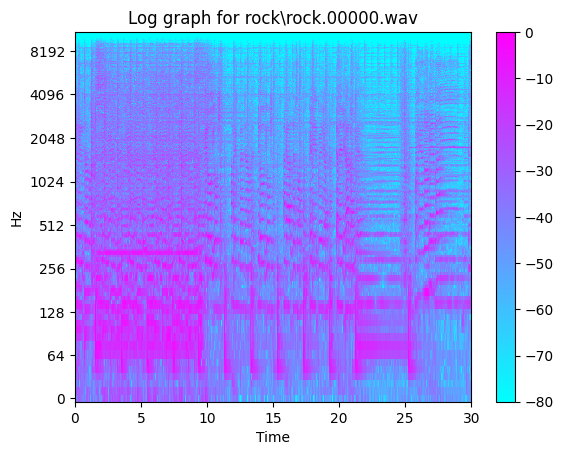

In [39]:
win_size = 2048
hop_length = 512

for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    stft = librosa.stft(audio,n_fft=win_size,hop_length=hop_length)  # STFT of y
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    lplt.specshow(stft,sr=sfreq,x_axis='time',y_axis='hz')
    ax.set(title=tracks[i])
    plt.colorbar()
    plt.show()

for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    stft = librosa.stft(audio,n_fft=win_size,hop_length=hop_length)  # STFT of y
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    lplt.specshow(stft_db,sr=sfreq,x_axis='time',y_axis='log',cmap='cool')
    ax.set(title=f'Log graph for {tracks[i]}')
    plt.colorbar()
    plt.show()


Text(0, 0.5, 'BPM')

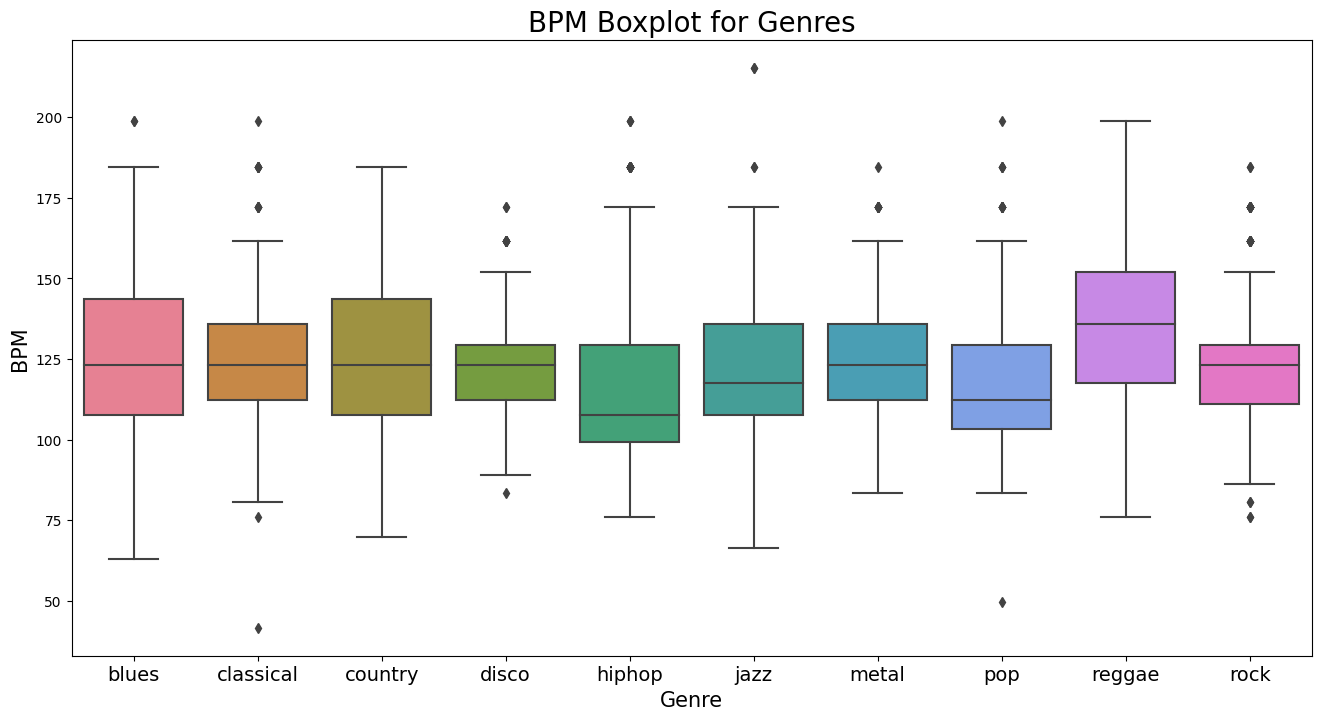

In [40]:
import seaborn as sns

x = metadata[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)